<a href="https://colab.research.google.com/github/RealMyeong/Aiffel_Exploration/blob/main/EX_BS2_project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#라이브러리 import 
from PIL import Image
import matplotlib.pyplot as plt
import glob
import os

## 데이터 불러오기 and resize 하기

In [ ]:
#이미지 사이즈 28x28로 바꾸는 함수 정의

def resize_img(data_path):
  images = glob.glob(data_path + '/*.jpg')
  print(len(images), ' images to be resized')

  #target size를 28x28로 설정
  target_size=(28,28)
  for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, 'JPEG')
  
  print(len(images), ' images resized')

In [ ]:
#가위 사이즈 바꾸기
data_path_s = '/content/drive/MyDrive/가위바위보/train/가위'
resize_img(data_path_s)

207  images to be resized
207  images resized


In [ ]:
#바위 사이즈 바꾸기
data_path_r = '/content/drive/MyDrive/가위바위보/train/바위'
resize_img(data_path_r)

114  images to be resized
114  images resized


In [ ]:
#보 사이즈 바꾸기
data_path_p = '/content/drive/MyDrive/가위바위보/train/보'
resize_img(data_path_p)

107  images to be resized
107  images resized


## 가위,바위,보 이미지 데이터를 불러오는 load_data 함수 정의하기

In [ ]:
#load_data 함수 정의하기

import numpy as np

def load_data_train(img_path, number_of_data=428):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/가위/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/바위/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/보/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_data_path = '/content/drive/MyDrive/가위바위보/train'
(x_train, y_train)=load_data_train(image_data_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 428 입니다.
x_train shape: (428, 28, 28, 3)
y_train shape: (428,)


라벨:  0


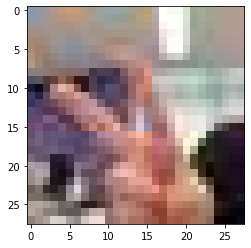

In [ ]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 딥러닝 네트워크 설계하기

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
#LeNet 설계
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
tf.keras.layers.Dropout(0.2)
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


## 모델 학습시키기

In [ ]:
#학습 진행
#train 데이터를 잘 분류하게 만들어줌
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
14/14 [==============================] - 2s 93ms/step - loss: 35.5101 - accuracy: 0.4393
Epoch 2/10
14/14 [==============================] - 1s 69ms/step - loss: 0.9901 - accuracy: 0.7009
Epoch 3/10
14/14 [==============================] - 1s 65ms/step - loss: 0.5212 - accuracy: 0.8178
Epoch 4/10
14/14 [==============================] - 1s 65ms/step - loss: 0.2708 - accuracy: 0.9065
Epoch 5/10
14/14 [==============================] - 1s 62ms/step - loss: 0.0919 - accuracy: 0.9813
Epoch 6/10
14/14 [==============================] - 1s 64ms/step - loss: 0.0362 - accuracy: 0.9930
Epoch 7/10
14/14 [==============================] - 1s 64ms/step - loss: 0.0234 - accuracy: 0.9907
Epoch 8/10
14/14 [==============================] - 1s 65ms/step - loss: 0.0177 - accuracy: 1.0000
Epoch 9/10
14/14 [==============================] - 1s 65ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 10/10
14/14 [==============================] - 1s 69ms/step - loss: 0.0026 - accuracy: 1.0000


In [ ]:
def load_data_test(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/가위_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/바위_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/보_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("시험 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [ ]:
#가위 사이즈 바꾸기
data_path_s_test = '/content/drive/MyDrive/가위바위보/test/가위_test'
resize_img(data_path_s_test)
#가위 사이즈 바꾸기
data_path_r_test = '/content/drive/MyDrive/가위바위보/test/바위_test'
resize_img(data_path_r_test)
#가위 사이즈 바꾸기
data_path_p_test = '/content/drive/MyDrive/가위바위보/test/보_test'
resize_img(data_path_p_test)

100  images to be resized
100  images resized
100  images to be resized
100  images resized
100  images to be resized
100  images resized


In [ ]:
#test 데이터 생성
image_data_path = '/content/drive/MyDrive/가위바위보/test'
(x_test, y_test)=load_data_test(image_data_path)
x_test_norem = x_test/255.0

시험 데이터(x_test)의 이미지 개수는 300 입니다.


In [ ]:
#test 데이터에 대해서 한 번 정확도 확인
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 4.2892 - accuracy: 0.2533 - 323ms/epoch - 32ms/step
test_loss: 4.289200305938721 
test_accuracy: 0.25333333015441895


- 정확도가 25% 나와서 파라미터 바꿔가면서 정확도 측정

In [ ]:
# 바꿔 볼 수 있는 하이퍼파라미터들
# 하이퍼 파라미터를 바꿔가며 확인 가능
n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=5

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

1. n_channel_1=32 \
n_channel_2=32 \
n_dense=64 \
n_train_epoch=10 \
정확도 : 42.6%

2. n_channel_1=32 \
n_channel_2=64 \
n_dense=64 \
n_train_epoch=10 \
정확도 : 29%

3. n_channel_1=64 \
n_channel_2=128 \
n_dense=64 \
n_train_epoch=5 \
정확도 : 50%

## 회고

지금까지 EXPLORATION을 진행하면서 처음으로 기준에 못미쳤다... 항상 익스가 문제없이 진행돼서 내가 생각보다 잘 하고 있는건가...??? 라는 생각이 들었는데... 내가 잘 한게 아니라 사실 LMS의 진행이 너무 좋았던 것 같다. 아직은 많이 부족하다는 걸 알았고, 다시 초심으로 돌아가 열심히 해야 겠다는 생각이 드는 익스였다.

그래도 왜 점수가 안나오는지에 대한 고찰은 한 번 해봤다...ㅎㅎ

일단 내가 만든 데이터가 너무 편향되어 있다. 데이터 수를 보면 가위가 200장 정도 되고 나머지 바위, 보는 100장 언저리로 가위 이미지가 다른 이미지에 비해 더 많기 때문에 모델이 학습을 잘 못한 것 같다. 이 문제는 다른 사람들이 찍은 모든 데이터를 한 곳에 모아서 학습을 진행하고 테스트를 했다면 해결 될 것 같지만 돌아다니면서 자료좀 달라고 하는게 너무 호들갑 떠는 것 같아서 그 방법은 접어뒀다.

그리고 사진을 찍을때 최대한 각도, 배경, 크기를 다르게 한다고 했지만 이게 캡쳐를 할 때 1초에 24프레임을 캡쳐하다 보니까 웬만큼 빠르게 움직이는게 아니면 거의 동일한 사진이 있어보인다. 물론 컴퓨터가 인식할때는 픽셀값들이 다 다르겠지만 크게 차이가 없다고 느꼈을 것 같다.

이번 익스는 전반적으로 나의 자만에 대해 돌아보았고, 처음 AIFFEL에 들어올 때의 마음가짐을 다시한번 되새기는 그런 익스였다!! 